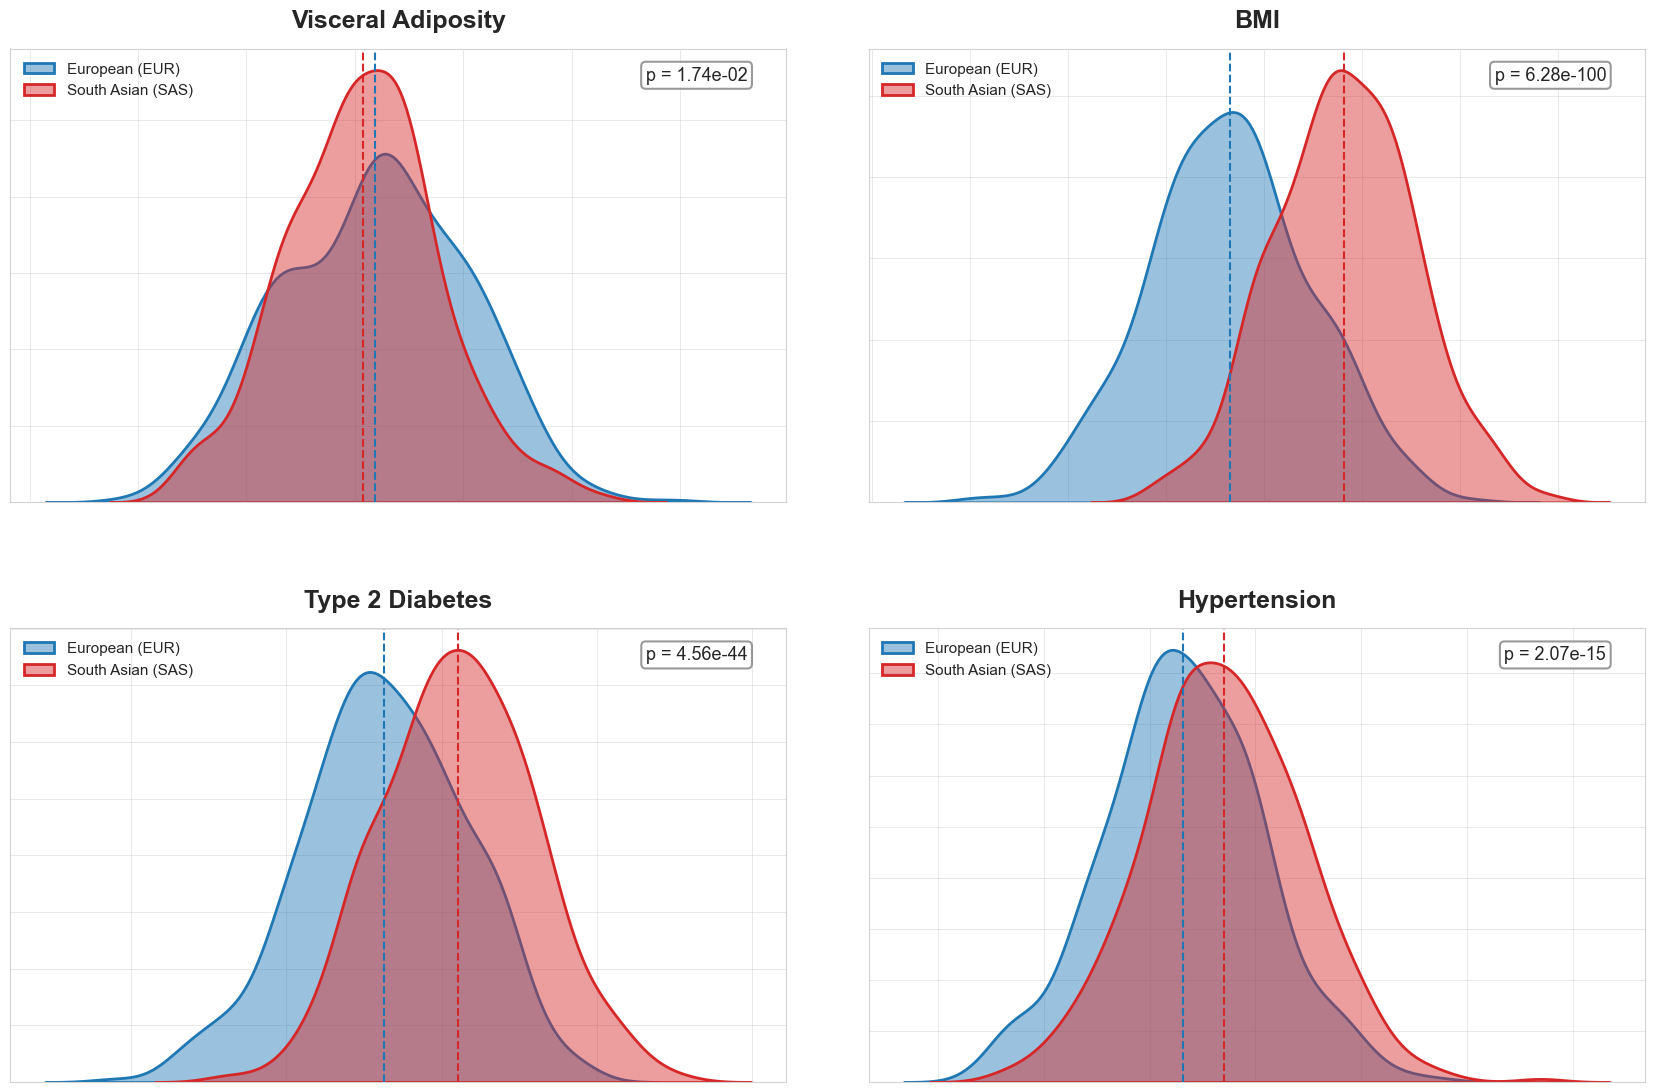

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import numpy as np
import matplotlib.ticker as mticker

# --- Global Style ---
sns.set(style="whitegrid", context="talk", font_scale=1.1)
palette = {"EUR": "#1f77b4", "SAS": "#d62728"}

# --- Disease file mapping ---
diseases = {
    "Visceral Adiposity": "VscAdi",
    "BMI": "BMI",
    "Type 2 Diabetes": "T2D",
    "Hypertension": "Hypertension"
}

base_eur = "/Users/vineetk/Documents/KCDH-A/Novo_Hackathon/All_Scores"
base_sas = "/Users/vineetk/Documents/KCDH-A/Novo_Hackathon/All_Scores"

# --- Setup figure ---
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for ax, (disease, prefix) in zip(axes, diseases.items()):
    try:
        # Load PRS data
        dfEUR = pd.read_csv(f"{base_eur}/{prefix}_EUR.sscore", sep=r"\s+", engine="python")
        dfSAS = pd.read_csv(f"{base_sas}/{prefix}_SAS.sscore", sep=r"\s+", engine="python")

        prs_EUR = dfEUR["SCORE1_AVG"].dropna()
        prs_SAS = dfSAS["SCORE1_AVG"].dropna()

        # Welch's t-test
        _, p_value = stats.ttest_ind(prs_EUR, prs_SAS, equal_var=False)

        # KDE plots
        sns.kdeplot(prs_EUR, label="European (EUR)", fill=True, alpha=0.45,
                    color=palette["EUR"], linewidth=2, ax=ax)
        sns.kdeplot(prs_SAS, label="South Asian (SAS)", fill=True, alpha=0.45,
                    color=palette["SAS"], linewidth=2, ax=ax)

        # Mean lines
        ax.axvline(prs_EUR.mean(), color=palette["EUR"], linestyle="--", lw=1.5)
        ax.axvline(prs_SAS.mean(), color=palette["SAS"], linestyle="--", lw=1.5)

        # Title and p-value box
        ax.set_title(f"{disease}", fontsize=18, fontweight="bold", pad=15)
        ax.text(0.95, 0.93, f"p = {p_value:.2e}", transform=ax.transAxes,
                ha="right", fontsize=13, bbox=dict(boxstyle="round,pad=0.25",
                facecolor="white", edgecolor="grey", alpha=0.8))
        
        # Legend
        ax.legend(frameon=False, fontsize=11, loc="upper left")

        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xticklabels([])
        ax.set_yticklabels([])

        # Make gridlines thin
        ax.grid(True, which="major", linestyle="-", linewidth=0.5, color="lightgrey", alpha=0.7)
        ax.set_axisbelow(True)

    
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color("lightgrey")
            spine.set_linewidth(0.8)

    except Exception as e:
        ax.text(0.5, 0.5, f"Error loading {disease}\n{e}", ha="center", va="center", fontsize=10)
        ax.axis("off")

# --- Figure Layout ---
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.93)
plt.show()

Number of Wegovy target individuals: 106
484
Number of Wegovy targets at risk of contraindications: 12


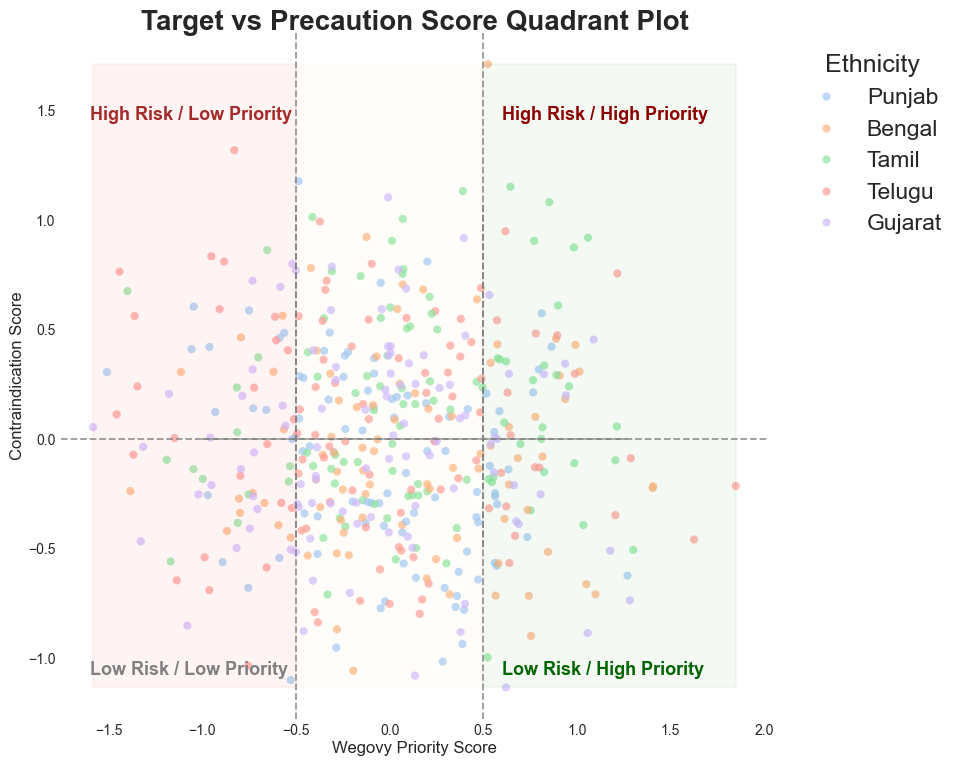

In [ ]:
# Loading CSV
input_file = "/Users/vineetk/Documents/KCDH-A/Novo_Hackathon/plots/combined_risks_scatter.csv"  
df = pd.read_csv(input_file)

# --- Style ---
sns.set(style="white", context="talk")

# --- Create figure ---
plt.figure(figsize=(10, 8))
palette = sns.color_palette("pastel", n_colors=df["Ethnicity_x"].nunique())

ethnicity_map = {
    "PJL": "Punjab",
    "BEB": "Bengal",
    "STU": "Tamil",
    "ITU": "Telugu",
    "GIH": "Gujarat"
}
df["Ethnicity_x"] = df["Ethnicity_x"].map(ethnicity_map).fillna(df["Ethnicity_x"])

# --- Define thresholds ---
target_threshold = 0.5
contraindication_threshold = 0.5

# --- Calculate counts ---
num_target_individuals = (df["TARGET_SCORE"] > target_threshold).sum()
num_individuals = (df["TARGET_SCORE"] != 10).sum()
num_contraindicated_targets = ((df["TARGET_SCORE"] > target_threshold) & 
                               (df["PRECAUTION_SCORE"] > contraindication_threshold)).sum()

# --- Print results ---
print(f"Number of Wegovy target individuals: {num_target_individuals}")
print(num_individuals)
print(f"Number of Wegovy targets at risk of contraindications: {num_contraindicated_targets}")

# --- Scatter plot ---
sns.scatterplot(
    data=df,
    x="TARGET_SCORE",
    y="PRECAUTION_SCORE",
    hue="Ethnicity_x",
    palette=palette,
    s=35,         # smaller points
    alpha=0.7,
    edgecolor="none"
)

# --- Fixed quadrant lines ---
plt.axvline(x=-0.5, color="grey", linestyle="--", lw=1.3, alpha=0.8)
plt.axvline(x=0.5, color="grey", linestyle="--", lw=1.3, alpha=0.8)
plt.axhline(y=0, color="grey", linestyle="--", lw=1.3, alpha=0.8)

plt.fill_betweenx(
    y=[df["PRECAUTION_SCORE"].min(), df["PRECAUTION_SCORE"].max()],
    x1=0.5, x2=df["TARGET_SCORE"].max(),
    color="green", alpha=0.045
)
plt.fill_betweenx(
    y=[df["PRECAUTION_SCORE"].min(), df["PRECAUTION_SCORE"].max()],
    x1=-0.5, x2=0.5,
    color="orange", alpha=0.02
)
plt.fill_betweenx(
    y=[df["PRECAUTION_SCORE"].min(), df["PRECAUTION_SCORE"].max()],
    x1=df["TARGET_SCORE"].min(), x2=-0.5,
    color="red", alpha=0.045
)
x_min, x_max = df["TARGET_SCORE"].min(), df["TARGET_SCORE"].max()
y_min, y_max = df["PRECAUTION_SCORE"].min(), df["PRECAUTION_SCORE"].max()

plt.axvline(x=-0.5, ymin=0.25, ymax=0.75, color="grey", linestyle="--", lw=1.3, alpha=0.8)
plt.axvline(x=0.5, ymin=0.25, ymax=0.75, color="grey", linestyle="--", lw=1.3, alpha=0.8)
plt.axhline(y=0, xmin=0.2, xmax=0.8, color="grey", linestyle="--", lw=1.3, alpha=0.8)

y_top = df["PRECAUTION_SCORE"].max() * 0.85
y_bottom = df["PRECAUTION_SCORE"].min() * 0.95

plt.text(0.6, y_top, "High Risk / High Priority", fontsize=13, color="darkred", fontweight="bold")
plt.text(-1.6, y_top, "High Risk / Low Priority", fontsize=13, color="brown", fontweight="bold")
plt.text(0.6, y_bottom, "Low Risk / High Priority", fontsize=13, color="darkgreen", fontweight="bold")
plt.text(-1.6, y_bottom, "Low Risk / Low Priority", fontsize=13, color="gray", fontweight="bold")

# --- Aesthetics ---
plt.title("Target vs Precaution Score Quadrant Plot", fontsize=20, fontweight="bold", pad=2)
plt.tick_params(axis='both', which='major', pad=1, length=3, labelsize=10)
plt.xlabel("Wegovy Priority Score", fontsize=12, labelpad=2)
plt.ylabel("Contraindication Score", fontsize=12, labelpad=2)
plt.tight_layout(pad=0.003)

plt.legend(title="Ethnicity", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
sns.despine(left=True, bottom=True)

plt.grid(False)

plt.tight_layout()
plt.show()

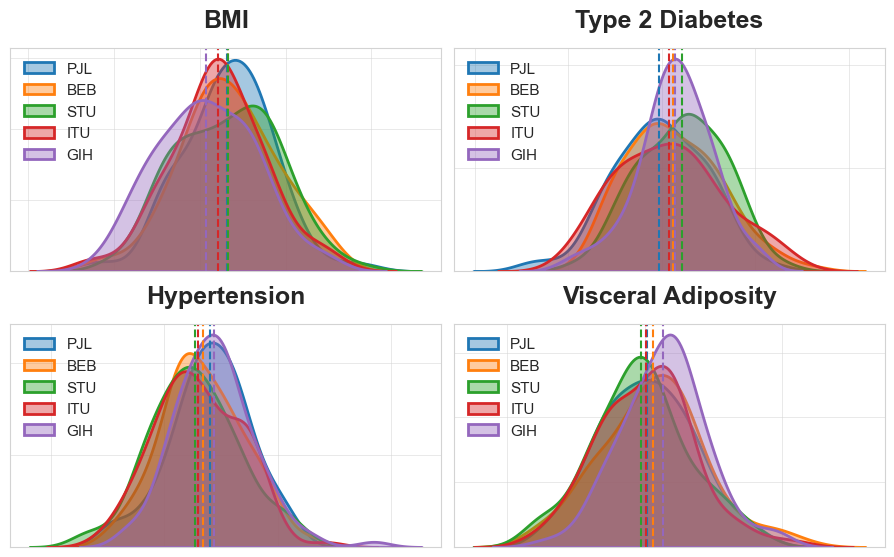

In [ ]:
# --- Load CSV ---
df = pd.read_csv("/Users/vineetk/Documents/KCDH-A/Novo_Hackathon/plots/combined_risks_scatter.csv")

# --- Define diseases and columns ---
diseases = {
    "BMI": "PRS_BMI",
    "Type 2 Diabetes": "PRS_T2D",
    "Hypertension": "PRS_Hypertension",
    "Visceral Adiposity": "PRS_VisceralAdiposity"
}

ethnicities = ["PJL", "BEB", "STU", "ITU", "GIH"]

# --- Color palette for ethnicities ---
palette = sns.color_palette("tab10", n_colors=len(ethnicities))

# --- Setup figure ---
fig, axes = plt.subplots(2, 2, figsize=(9, 5.5))
axes = axes.flatten()

for ax, (disease_name, col) in zip(axes, diseases.items()):
    for eth, color in zip(ethnicities, palette):
        # Subset for ethnicity
        subset = df[df["Ethnicity_x"] == eth][col].dropna()
        if len(subset) == 0:
            continue
        
        # KDE plot
        sns.kdeplot(subset, label=eth, fill=True, alpha=0.4, linewidth=2, color=color, ax=ax)
        
        # Optional: mean line
        ax.axvline(subset.mean(), color=color, linestyle="--", lw=1.5)

    # Title
    ax.set_title(disease_name, fontsize=18, fontweight="bold", pad=15)
    
    # Remove axis labels and ticks
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    # Subtle gridlines
    ax.grid(True, which="major", linestyle="-", linewidth=0.5, color="lightgrey", alpha=0.7)
    ax.set_axisbelow(True)
    
    # Legend
    ax.legend(frameon=False, fontsize=11, loc="upper left")
    
    # Faint borders
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("lightgrey")
        spine.set_linewidth(0.8)

# --- Overall figure layout ---
plt.tight_layout(pad=.5)
plt.subplots_adjust(top=0.93)

plt.show()


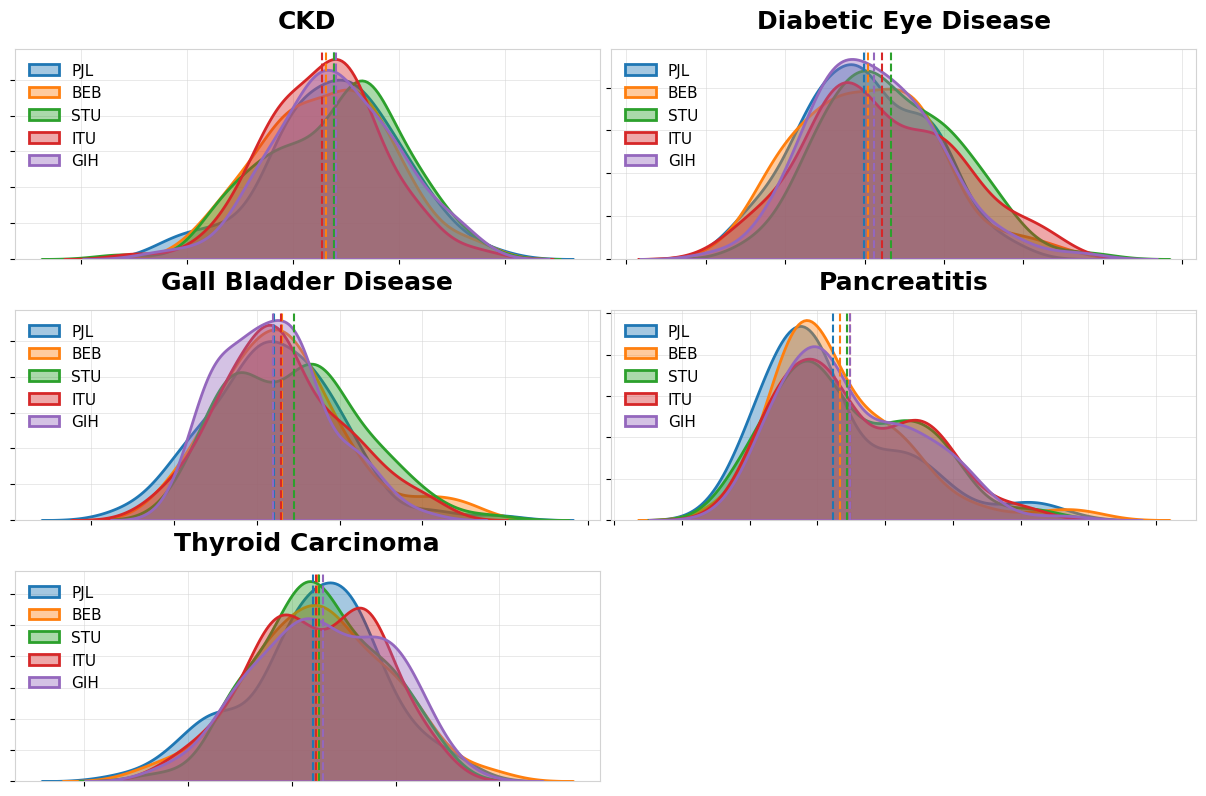

In [ ]:
# --- Load CSV ---
df = pd.read_csv("/Users/vineetk/Documents/KCDH-A/Novo_Hackathon/plots/combined_risks_scatter.csv")

# --- Define diseases and columns ---
diseases = {
    "CKD": "PRS_CKD",
    "Diabetic Eye Disease": "PRS_DiabeticEyeDisease",
    "Gall Bladder Disease": "PRS_GallBladderDisease",
    "Pancreatitis": "PRS_NeoplasticPancreatitis",
    "Thyroid Carcinoma": "PRS_ThyroidCarcinoma"

}

ethnicities = ["PJL", "BEB", "STU", "ITU", "GIH"]

# --- Color palette for ethnicities ---
palette = sns.color_palette("tab10", n_colors=len(ethnicities))

# --- Setup figure ---
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, (disease_name, col) in zip(axes, diseases.items()):
    for eth, color in zip(ethnicities, palette):
        # Subset for ethnicity
        subset = df[df["Ethnicity_x"] == eth][col].dropna()
        if len(subset) == 0:
            continue
        
        # KDE plot
        sns.kdeplot(subset, label=eth, fill=True, alpha=0.4, linewidth=2, color=color, ax=ax)
        
        # Mean line
        ax.axvline(subset.mean(), color=color, linestyle="--", lw=1.5)

    # Title
    ax.set_title(disease_name, fontsize=18, fontweight="bold", pad=15)
    
    # Remove axis labels and ticks
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
    ax.grid(True, which="major", linestyle="-", linewidth=0.5, color="lightgrey", alpha=0.7)
    ax.set_axisbelow(True)
    
    ax.legend(frameon=False, fontsize=11, loc="upper left")
    
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color("lightgrey")
        spine.set_linewidth(0.8)

if len(diseases) < len(axes):
    for ax in axes[len(diseases):]:
        ax.axis('off')

plt.tight_layout(pad=.5)
plt.subplots_adjust(top=0.93)

plt.show()
